In [1]:
a=5
print(a)

5


In [2]:
import numpy as np


In [3]:
np.pi

3.141592653589793

In [4]:
import pandas as pd

In [5]:
data = pd.read_csv("./data_SNat/BRGM_Mayotte_2018.txt",delimiter = "\t")
print(data.head())

          sec           p0            p1     p2   mag
0  3735155991  567319.9369  8.598171e+06  10000  3.97
1  3735177828  583643.5591  8.610293e+06      0  3.88
2  3735204075  587944.4743  8.595903e+06  10000  4.30
3  3735347280  570563.6804  8.592634e+06  10000  4.60
4  3735432720  572720.6826  8.587099e+06  10000  4.77


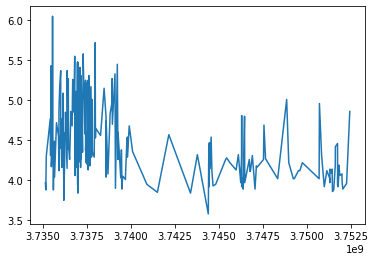

In [6]:
import matplotlib.pyplot as plt
plt.plot(data['sec'],data['mag'])
plt.show()

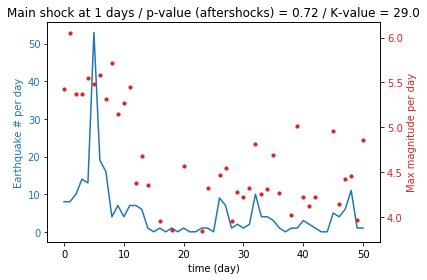

-0.7150780435754045
1.4653460502504292
1


In [7]:
from Codes_Graphes.OmoriUtsu import GraphOmoriUtsu,RegressionOU,RegressionOU_foreshock
a, b, idx_ms = GraphOmoriUtsu(data, 3600*24*4, 1, 1, 0)
print(a)
print(b)
print(idx_ms)


In [8]:
gap = 3600*24*4
nb_gap = int((data['sec'].max() - data['sec'].min()) // gap)
nt = []
magmax = []
title = 'Earthquake number and maximal magnitude per day'

for i in range(nb_gap + 1):
    dfbis = data[((i * gap + data['sec'].min()) <= data['sec']) & (((i + 1) * gap + data['sec'].min()) > data['sec'])]
    nt.append(len(dfbis))
    magmax.append(dfbis['mag'].max())

print(magmax)
print(nt)

[5.43, 6.05, 5.37, 5.37, 5.55, 5.48, 5.58, 5.31, 5.72, 5.15, 5.27, 5.45, 4.38, 4.68, 4.36, nan, 3.95, nan, 3.85, nan, 4.57, nan, nan, 3.84, 4.32, nan, 4.47, 4.54, 3.95, 4.28, 4.22, 4.32, 4.81, 4.26, 4.31, 4.69, 4.27, nan, 4.02, 5.01, 4.22, 4.12, 4.22, nan, nan, 4.96, 4.14, 4.42, 4.46, 3.96, 4.86]
[8, 8, 10, 14, 13, 53, 19, 16, 4, 7, 4, 7, 7, 6, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 9, 7, 1, 2, 1, 2, 10, 4, 4, 3, 1, 0, 1, 1, 3, 2, 1, 0, 0, 5, 4, 6, 11, 1, 1]


In [9]:
data = pd.read_csv("./data_SNat/CDSA_SeulementEssaimSaintes_2004-2005.txt",delimiter = "\t")
print(data.head())
print(data.iloc[[1]] )
first = data[data['sec'] == data['sec'].min()]
print(float(first['mag']))

            sec           p0            p1        p2   mag
0  3.345210e+09  647715.5545  1.751604e+06  8536.377  2.62
1  3.345210e+09  647246.2258  1.753006e+06  6107.910  1.49
2  3.345185e+09  654089.6093  1.751952e+06  2043.457  1.32
3  3.345003e+09  645922.8270  1.753510e+06  2003.906  1.04
4  3.345002e+09  645149.5431  1.753267e+06  8415.039  1.80
            sec           p0            p1       p2   mag
1  3.345210e+09  647246.2258  1.753006e+06  6107.91  1.49
3.05


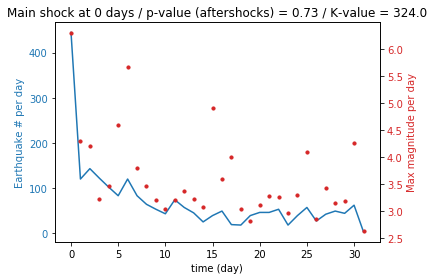

(-0.7303943607048005, 2.5100681712562873, 0)

In [10]:
GraphOmoriUtsu(data, 3600*24*13, 1, 1, 0)

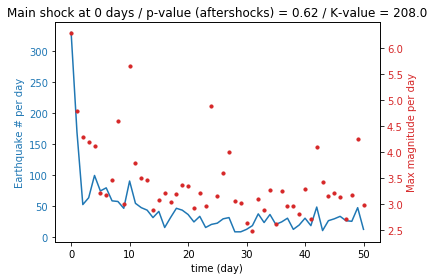

(-0.6230424774059395, 2.318649357804776, 0)

In [11]:
GraphOmoriUtsu(data, 3600*24*8, 1, 1, 0)

In [12]:
def findFirstSeisme(dataset):
    firstSeisme = dataset[dataset['sec'] == dataset['sec'].min()]
    return firstSeisme

In [13]:
def getDeltaT(dataset,currentLine):
    timeDF = dataset['sec']
    currentTime = currentLine['sec']
    deltaT = timeDF.apply(lambda x : int(x)-int(currentLine['sec']))
    return deltaT

#Test 1 

deltaT = getDeltaT(data, data[data['sec'] == data['sec'].min()]) 

print(max(deltaT))
print(float(deltaT.iloc[[0]])<=float(deltaT.iloc[[0]]))
#print(data[data['sec'] == data['sec'].max()]['sec'])
#print(data['sec'][0])
#print(data[data['sec'] == data['sec'].min()]['sec'])



35011652
True


In [14]:
from math import sin, cos, sqrt, atan2, radians

def getDist(lat1, lon1, lat2,lon2):
    R = 6373.0
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
    c = 2*atan2(sqrt(a),sqrt(1-a))
    distance = R*c
    return distance

def getDeltaDist(dataset,currentLine):
    coordDF = dataset[['p0','p1']]
    currentCoord = currentLine[['p0','p1']]
    list = []
    for i in range(len(dataset['p0'])):
        list.append(getDist(coordDF['p0'][i],coordDF['p1'][0],currentCoord['p0'],currentCoord['p1']))
    deltaDist = coordDF.apply(dist)
    coordDF['dist']=list
    
    return coordDF['dist']

#Test 1

print(data[['p0','p1','p2']])


               p0            p1         p2
0     647715.5545  1.751604e+06   8536.377
1     647246.2258  1.753006e+06   6107.910
2     654089.6093  1.751952e+06   2043.457
3     645922.8270  1.753510e+06   2003.906
4     645149.5431  1.753267e+06   8415.039
...           ...           ...        ...
2224  679952.2677  1.753681e+06  10085.449
2225  644548.2598  1.743090e+06  27900.000
2226  648250.3660  1.750398e+06  35000.000
2227  662797.8692  1.744543e+06  12886.963
2228  662303.4728  1.744292e+06  13908.691

[2229 rows x 3 columns]


In [15]:
def getDeltaMag(dataset, currentLine):
    magDF = dataset['mag']
    currentMag = currentLine['mag']
    deltaMag = magDF.apply(lambda x : abs(float(x)-float(currentLine['mag'])))
    return deltaMag

In [16]:
def getCorrectChilds(dataset, currentSeisme,maxDeltaT, maxDeltaDist, maxDeltaMag):
    deltaT = getDeltaT(dataset,currentSeisme)
    deltaDist = getDeltaMag(dataset,currentSeisme)
    deltaMag = getDeltaMag(dataset,currentSeisme)
    correctChilds = []
    for i in range(min(len(deltaT),len(deltaDist),len(deltaMag))):
        if (0<float(deltaT.iloc[[i]])<=maxDeltaT*1.3 and maxDeltaT/1.3<=float(deltaT.iloc[[i]]) and maxDeltaDist/1.3<=float(deltaDist.iloc[[i]])<=maxDeltaDist*1.3 and maxDeltaMag/1.3<=float(deltaMag.iloc[[i]])<=maxDeltaMag*1.3):
            child = [dataset.iloc[[i]],float(deltaT.iloc[[i]]),float(deltaDist.iloc[[i]]),float(deltaMag.iloc[[i]])]
            correctChilds.append(child)
    return correctChilds

In [17]:
def getCorrectChildsInit(dataset, currentSeisme,maxDeltaT, maxDeltaDist, maxDeltaMag):
    deltaT = getDeltaT(dataset,currentSeisme)
    deltaDist = getDeltaMag(dataset,currentSeisme)
    deltaMag = getDeltaMag(dataset,currentSeisme)
    correctChilds = []
    for i in range(min(len(deltaT),len(deltaDist),len(deltaMag))):
        if (0<float(deltaT.iloc[[i]])<=maxDeltaT and float(deltaDist.iloc[[i]])<=maxDeltaDist and float(deltaMag.iloc[[i]])<=maxDeltaMag):
            child = [dataset.iloc[[i]],float(deltaT.iloc[[i]]),float(deltaDist.iloc[[i]]),float(deltaMag.iloc[[i]])]
            correctChilds.append(child)
    return correctChilds

In [18]:
def DFS(root,dataset,maxDeltaT, maxDeltaDist, maxDeltaMag):
    if root.children == []:
        print("end of branch")
    else :
        for child in root.children:
            childChilds = getCorrectChilds(dataset,child.data[0],child.data[1], child.data[2], child.data[3])
            for j in range(len(childChilds)): 
                child.children.append(Tree(childChilds[j]))
            DFS(child,dataset,child.data[1], child.data[2], child.data[3])


In [19]:
class Tree:
    def __init__(self, data):
        self.children = []
        self.data = data
        print("new tree "+str(data))
    
    def getLongestBranch(self):
        print("oO")
        
        
    
tree = Tree(data[data['sec'] == data['sec'].min()])
root = tree
tree.children.append(Tree(data[data['sec'] == data['sec'].max()]))
tree.children.append(5)
print(tree.data)
print(tree.children[0].data)
print(root.children[0].data)


new tree                sec           p0            p1         p2   mag
2228  3.310199e+09  662303.4728  1.744292e+06  13908.691  3.05
new tree             sec           p0            p1        p2   mag
0  3.345210e+09  647715.5545  1.751604e+06  8536.377  2.62
               sec           p0            p1         p2   mag
2228  3.310199e+09  662303.4728  1.744292e+06  13908.691  3.05
            sec           p0            p1        p2   mag
0  3.345210e+09  647715.5545  1.751604e+06  8536.377  2.62
            sec           p0            p1        p2   mag
0  3.345210e+09  647715.5545  1.751604e+06  8536.377  2.62


In [20]:
!pip install anytree

from anytree import Node, RenderTree
udo = Node(data[data['sec'] == data['sec'].min()])
marc = Node("Marc", parent=udo)
lian = Node("Lian", parent=marc)
dan = Node("Dan", parent=udo)
jet = Node("Jet", parent=dan)
jan = Node("Jan", parent=dan)
joe = Node("Joe", parent=dan)

for pre, fill, node in RenderTree(udo):
    print("%s%s" % (pre, node.name))

!pip install graphviz
from anytree.exporter import DotExporter
# graphviz needs to be installed for the next line!

DotExporter(udo).to_picture("udo.png")

You should consider upgrading via the '/home/timon/anaconda3/bin/python -m pip install --upgrade pip' command.
               sec           p0            p1         p2   mag
2228  3.310199e+09  662303.4728  1.744292e+06  13908.691  3.05
├── Marc
│   └── Lian
└── Dan
    ├── Jet
    ├── Jan
    └── Joe
You should consider upgrading via the '/home/timon/anaconda3/bin/python -m pip install --upgrade pip' command.


In [ ]:
#HERE we base ourselves on 3 delta which is pretty restritive 
#MAYBE normalising and multiplying them is a better option
def createTree(maxDeltaT, maxDeltaDist, maxDeltaMag, dataset):
    firstSeisme = findFirstSeisme(dataset)
    root = Tree(firstSeisme)
    #First Step (not really essential but better to understand the Deep First Search)
    correctChilds = getCorrectChildsInit(dataset, firstSeisme,maxDeltaT, maxDeltaDist, maxDeltaMag)
    for j in range(len(correctChilds)): 
        root.children.append(Tree(correctChilds[i]))
        
    #Recursion Step => DFS
    DFS(root,dataset,maxDeltaT, maxDeltaDist, maxDeltaMag)
    return root

tree = createTree(10000000, 2000000, 10000000, data)
print(tree.data)

new tree                sec           p0            p1         p2   mag
2228  3.310199e+09  662303.4728  1.744292e+06  13908.691  3.05
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519

new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1     

new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1     

new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1     

new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1     

new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1     

new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1     

1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.9

new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1     

new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1     

1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.9

new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1     

1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.9

new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1     

new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1     

new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1     

new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1     

1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.9

new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98, 9238774.0, 0.06999999999999984, 0.06999999999999984]
new tree [               sec           p0            p1     

end of branch
end of branch
new tree [              sec           p0            p1         p2   mag
548  3.329881e+09  661221.5316  1.738798e+06  13084.717  3.06, 10443804.0, 0.08000000000000007, 0.08000000000000007]
new tree [              sec          p0            p1         p2   mag
564  3.329279e+09  652562.768  1.747007e+06  13348.389  3.05, 9841464.0, 0.06999999999999984, 0.06999999999999984]
new tree [              sec           p0            p1        p2   mag
119  3.342288e+09  644401.4578  1.752517e+06  6097.412  3.14, 12406206.0, 0.08000000000000007, 0.08000000000000007]
end of branch
end of branch
new tree [              sec           p0            p1         p2   mag
548  3.329881e+09  661221.5316  1.738798e+06  13084.717  3.06, 10443804.0, 0.08000000000000007, 0.08000000000000007]
new tree [              sec          p0            p1         p2   mag
564  3.329279e+09  652562.768  1.747007e+06  13348.389  3.05, 9841464.0, 0.06999999999999984, 0.06999999999999984]
new tre

end of branch
end of branch
new tree [              sec           p0            p1         p2   mag
548  3.329881e+09  661221.5316  1.738798e+06  13084.717  3.06, 10443804.0, 0.08000000000000007, 0.08000000000000007]
new tree [              sec          p0            p1         p2   mag
564  3.329279e+09  652562.768  1.747007e+06  13348.389  3.05, 9841464.0, 0.06999999999999984, 0.06999999999999984]
new tree [              sec           p0            p1        p2   mag
119  3.342288e+09  644401.4578  1.752517e+06  6097.412  3.14, 12406206.0, 0.08000000000000007, 0.08000000000000007]
end of branch
end of branch
new tree [              sec           p0            p1         p2   mag
548  3.329881e+09  661221.5316  1.738798e+06  13084.717  3.06, 10443804.0, 0.08000000000000007, 0.08000000000000007]
new tree [              sec          p0            p1         p2   mag
564  3.329279e+09  652562.768  1.747007e+06  13348.389  3.05, 9841464.0, 0.06999999999999984, 0.06999999999999984]
new tre

end of branch
end of branch
new tree [              sec           p0            p1         p2   mag
548  3.329881e+09  661221.5316  1.738798e+06  13084.717  3.06, 10443804.0, 0.08000000000000007, 0.08000000000000007]
new tree [              sec          p0            p1         p2   mag
564  3.329279e+09  652562.768  1.747007e+06  13348.389  3.05, 9841464.0, 0.06999999999999984, 0.06999999999999984]
new tree [              sec           p0            p1        p2   mag
119  3.342288e+09  644401.4578  1.752517e+06  6097.412  3.14, 12406206.0, 0.08000000000000007, 0.08000000000000007]
end of branch
end of branch
new tree [              sec           p0            p1         p2   mag
548  3.329881e+09  661221.5316  1.738798e+06  13084.717  3.06, 10443804.0, 0.08000000000000007, 0.08000000000000007]
new tree [              sec          p0            p1         p2   mag
564  3.329279e+09  652562.768  1.747007e+06  13348.389  3.05, 9841464.0, 0.06999999999999984, 0.06999999999999984]
new tre

end of branch
end of branch
new tree [              sec           p0            p1         p2   mag
548  3.329881e+09  661221.5316  1.738798e+06  13084.717  3.06, 10443804.0, 0.08000000000000007, 0.08000000000000007]
new tree [              sec          p0            p1         p2   mag
564  3.329279e+09  652562.768  1.747007e+06  13348.389  3.05, 9841464.0, 0.06999999999999984, 0.06999999999999984]
new tree [              sec           p0            p1        p2   mag
119  3.342288e+09  644401.4578  1.752517e+06  6097.412  3.14, 12406206.0, 0.08000000000000007, 0.08000000000000007]
end of branch
end of branch
new tree [              sec           p0            p1         p2   mag
548  3.329881e+09  661221.5316  1.738798e+06  13084.717  3.06, 10443804.0, 0.08000000000000007, 0.08000000000000007]
new tree [              sec          p0            p1         p2   mag
564  3.329279e+09  652562.768  1.747007e+06  13348.389  3.05, 9841464.0, 0.06999999999999984, 0.06999999999999984]
new tre

end of branch
end of branch
new tree [              sec           p0            p1         p2   mag
548  3.329881e+09  661221.5316  1.738798e+06  13084.717  3.06, 10443804.0, 0.08000000000000007, 0.08000000000000007]
new tree [              sec          p0            p1         p2   mag
564  3.329279e+09  652562.768  1.747007e+06  13348.389  3.05, 9841464.0, 0.06999999999999984, 0.06999999999999984]
new tree [              sec           p0            p1        p2   mag
119  3.342288e+09  644401.4578  1.752517e+06  6097.412  3.14, 12406206.0, 0.08000000000000007, 0.08000000000000007]
end of branch
end of branch
new tree [              sec           p0            p1         p2   mag
548  3.329881e+09  661221.5316  1.738798e+06  13084.717  3.06, 10443804.0, 0.08000000000000007, 0.08000000000000007]
new tree [              sec          p0            p1         p2   mag
564  3.329279e+09  652562.768  1.747007e+06  13348.389  3.05, 9841464.0, 0.06999999999999984, 0.06999999999999984]
new tre

end of branch
end of branch
new tree [              sec           p0            p1         p2   mag
548  3.329881e+09  661221.5316  1.738798e+06  13084.717  3.06, 10443804.0, 0.08000000000000007, 0.08000000000000007]
new tree [              sec          p0            p1         p2   mag
564  3.329279e+09  652562.768  1.747007e+06  13348.389  3.05, 9841464.0, 0.06999999999999984, 0.06999999999999984]
new tree [              sec           p0            p1        p2   mag
119  3.342288e+09  644401.4578  1.752517e+06  6097.412  3.14, 12406206.0, 0.08000000000000007, 0.08000000000000007]
end of branch
end of branch
new tree [              sec           p0            p1         p2   mag
548  3.329881e+09  661221.5316  1.738798e+06  13084.717  3.06, 10443804.0, 0.08000000000000007, 0.08000000000000007]
new tree [              sec          p0            p1         p2   mag
564  3.329279e+09  652562.768  1.747007e+06  13348.389  3.05, 9841464.0, 0.06999999999999984, 0.06999999999999984]
new tre

end of branch
end of branch
new tree [              sec           p0            p1         p2   mag
548  3.329881e+09  661221.5316  1.738798e+06  13084.717  3.06, 10443804.0, 0.08000000000000007, 0.08000000000000007]
new tree [              sec          p0            p1         p2   mag
564  3.329279e+09  652562.768  1.747007e+06  13348.389  3.05, 9841464.0, 0.06999999999999984, 0.06999999999999984]
new tree [              sec           p0            p1        p2   mag
119  3.342288e+09  644401.4578  1.752517e+06  6097.412  3.14, 12406206.0, 0.08000000000000007, 0.08000000000000007]
end of branch
end of branch
new tree [              sec           p0            p1         p2   mag
548  3.329881e+09  661221.5316  1.738798e+06  13084.717  3.06, 10443804.0, 0.08000000000000007, 0.08000000000000007]
new tree [              sec          p0            p1         p2   mag
564  3.329279e+09  652562.768  1.747007e+06  13348.389  3.05, 9841464.0, 0.06999999999999984, 0.06999999999999984]
new tre

end of branch
end of branch
new tree [              sec           p0            p1         p2   mag
548  3.329881e+09  661221.5316  1.738798e+06  13084.717  3.06, 10443804.0, 0.08000000000000007, 0.08000000000000007]
new tree [              sec          p0            p1         p2   mag
564  3.329279e+09  652562.768  1.747007e+06  13348.389  3.05, 9841464.0, 0.06999999999999984, 0.06999999999999984]
new tree [              sec           p0            p1        p2   mag
119  3.342288e+09  644401.4578  1.752517e+06  6097.412  3.14, 12406206.0, 0.08000000000000007, 0.08000000000000007]
end of branch
end of branch
new tree [              sec           p0            p1         p2   mag
548  3.329881e+09  661221.5316  1.738798e+06  13084.717  3.06, 10443804.0, 0.08000000000000007, 0.08000000000000007]
new tree [              sec          p0            p1         p2   mag
564  3.329279e+09  652562.768  1.747007e+06  13348.389  3.05, 9841464.0, 0.06999999999999984, 0.06999999999999984]
new tre

In [ ]:
print(getCorrectChilds(data, findFirstSeisme(data),20000,10,10)[0][3])